# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
print(dataset)
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values


            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1)

print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### **Converting 'y' before feature Scaling:**


---


**StandardScalar** is a class of **scikitLearn** library and this class has a method of `fit_transform` to transform the numerical data into the range of the -3 to +3 and this `fit_transform()` methods expects *2D array *
So , we have to convert the y into 2D array and we will do this by using **Numpy** library method which is `*np.arr.reshape()*`

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_transformed = sc_X.fit_transform(X)
y_transformed = sc_y.fit_transform(y)

In [7]:
print(X_transformed )

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y_transformed)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### **Why we make 2 seperate objects for transforming X and y**


---


Sir made two objects for this dataset but in my view and experiment, i have not noticed any change in the values if we use single or one **StandardScalar** object for both the transformation  
but we have to make the 2 objects for the predictions where we have to use the object which is used to scale X to acurately scale the 6.5 value of prediction  

**"Lets make the single object and check results for practicing purposes "**



In [9]:
sc_same_for_both_XY = StandardScaler()

X1 = sc_same_for_both_XY.fit_transform(X)
y1 = sc_same_for_both_XY.fit_transform(y)

In [10]:
print(X1)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y1)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## **ISSUE REPORTED**

we are making 2 objects of standardScalar class because we to predict the value at the end and we have to use the scalar object of which is used to scale the X because variance and standard deviation is and calculated by the object used for X is different from the object used for the Y 

## Training the SVR model on the whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_transformed,y_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) 

array([170370.0204065])

**we only used transform() method here and not fit_transform because , fit method already calculated the mean , variance , standard deviation etc and transform method is used just to scale the 6.5 using fit methods calculated results**

## Visualising the SVR results

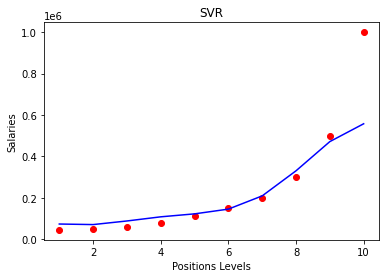

In [20]:
plt.scatter(X,y, color='r')
plt.plot(X,sc_y.inverse_transform(regressor.predict(sc_X.transform(X))) , color = 'b')
plt.title("SVR")
plt.xlabel("Positions Levels")
plt.ylabel("Salaries")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
AFTER
[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9

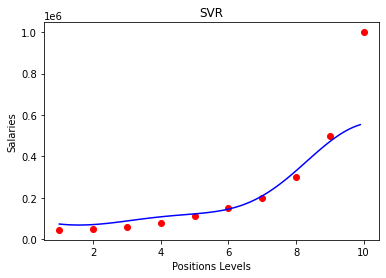

In [25]:
X_grid = np.arange(min(X), max(X), 0.1 )
print(X_grid)
X_grid = X_grid.reshape((len(X_grid), 1))
print("AFTER")
print(X_grid)


plt.scatter(X,y, color='r')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))) , color = 'b')
plt.title("SVR")
plt.xlabel("Positions Levels")
plt.ylabel("Salaries")
plt.show()

# **CONGRATULATIONS MEER**
## You have done really a great job!!!


---
# **keep it up Man**
